In [8]:
library(tidyverse)
install.packages("lubridate")  
library(lubridate)
library(dplyr)
library(readr)
library(ggplot2)

players <- read_csv("/home/jovyan/work/dsci-100-student/project/players.csv")
sessions <- read_csv("/home/jovyan/work/dsci-100-student/project/sessions.csv")

merged_data <- left_join(players,sessions, by = "hashedEmail")

merged_data <- merged_data|>
    select(-hashedEmail,-original_start_time,-original_end_time)
    merged_data$Age[is.na(merged_data$Age)] <- mean(merged_data$Age, na.rm = TRUE)

merged_data


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



ERROR: Error: '/home/jovyan/work/dsci-100-student/project/players.csv' does not exist.


To get a large amount of data, total sessions, total play time, and average session duration are key indicators.  
Let’s call these **engagement level metrics**.

1. Relation between "age" and engagement level metrics  
    > Do older players spend more time per session? (age vs average session duration)

2. Relation between "experience" and engagement level metrics  
    > Do players with more experience tend to play more? (experience vs Avergae Played Hours)

3. Relation between "gender" and engagement level metrics  
    > Which gender has more sessions? (gender vs total sessions)

4. Relation between "subscription" and engagement level metrics  
    > Do subscribers tend to play more than non-subscribers? (subscribe vs total play time)


**1. Do older players spend more time per session? (age vs average session duration)**

In [4]:
merged_data <- merged_data|>
    mutate(
        start_time = as.POSIXct(start_time, format = "%m/%d/%Y %H:%M"),
        end_time = as.POSIXct(end_time, format = "%m/%d/%Y %H:%M"),
        session_duration = as.numeric(difftime(end_time, start_time, units = "mins"))
    )

# Outliers were detected.(start_time,end time)
# Checking sum of all session time and duplicated session time are same.
name_order <- merged_data |>
  count(name, sort = TRUE) |>
  pull(name)

merged_data$name <- factor(merged_data$name, levels = name_order)

merged_data <- merged_data |>
  arrange(name,start_time)

# merged_data <- merged_data |>
#     filter(name == "Morgan") |>
#     arrange(start_time)
# The outliers represented non-overlapping, extremely long sessions and were unlikely to affect the analysis, so we removed them from the dataset.

merged_data_clean <- merged_data |>
  filter(session_duration <= 1440 ,!is.na(start_time),!is.na(end_time))

merged_data_clean


ERROR: Error in eval(expr, envir, enclos): object 'merged_data' not found


**2. Do players with more experience tend to play more? (experience vs Avergae Played Hours)**

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8) 

tidy_player_dataset <- players |> 
    mutate(experience = as_factor(experience), 
           subscribe = as_factor(subscribe), 
           gender = as_factor(gender)) |>
    mutate(subscribe = fct_recode(subscribe, "Subscribed" = "TRUE", "Not Subscribed" = "FALSE"))

avg_played_hours <- tidy_player_dataset |>
  group_by(experience) |> 
  summarise(avg_hours = mean(played_hours, na.rm = TRUE))


experience_bar <- ggplot(avg_played_hours, aes(x = experience, y = avg_hours, fill = experience)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Played Hours vs. Experience Level",
       x = "Experience Level",
       y = "Average Played Hours(hrs)") +
  theme(text = element_text(size = 15))

experience_bar

Bar Plot: Average Played Hours vs. Experience Level

The bar plot shows that "Regular" players have the highest average playtime, significantly exceeding all other experience levels. "Veteran" players have the lowest average playtime, suggesting that higher experience does not necessarily lead to greater engagement. "Pro" and "Amateur" players fall in the middle range, while "Beginner" players have the lowest playtime overall. This pattern indicates that e "Regular" players appear to be the most engaged. Therefore, we should recruit "Regular" players as they most likely to contribute a large amount of data(greater play time). 

**3. Which gender has more sessions? (gender vs total sessions)**

In [ ]:
gender_sessions <- sessions |>
filter(!is.na(gender)) |>
select(name, gender, start_time, end_time, session_duration) |>
group_by(gender) |>
summarize(total_sessions=n()) 
gender_sessions

gender_sessions_plot <- gender_sessions |>
ggplot(aes(x=gender, y=total_sessions, fill=gender)) +
geom_bar(stat="identity") +
labs(title="Total Sessions Related to Gender", x="Player's Gender", y="Total Count") +
theme(text = element_text(size=20))
gender_sessions_plot

1. Filter out rows with missing gender(NA) from gender column using `filter` function.
2. Select five column names (name, gender, start_time, end_time, session_duration) from data using `select` function.
3. Group the data by gender using `group_by` function.
4. Calculate total number of rows in sessions data for each gender using `summarize` function, then make a new name: total_sessions.
5. Print out gender_sessions.
6. Create a plot for relationship between gender and total sessions using gender_sessions data.
7. Using x = gender, y = total_sessions and fill gender to create a bar chart and create a title and each name of xlab and ylab using `labs` to combine it.

**4. Do subscribers tend to play more than non-subscribers? (subscribe vs total play time)**

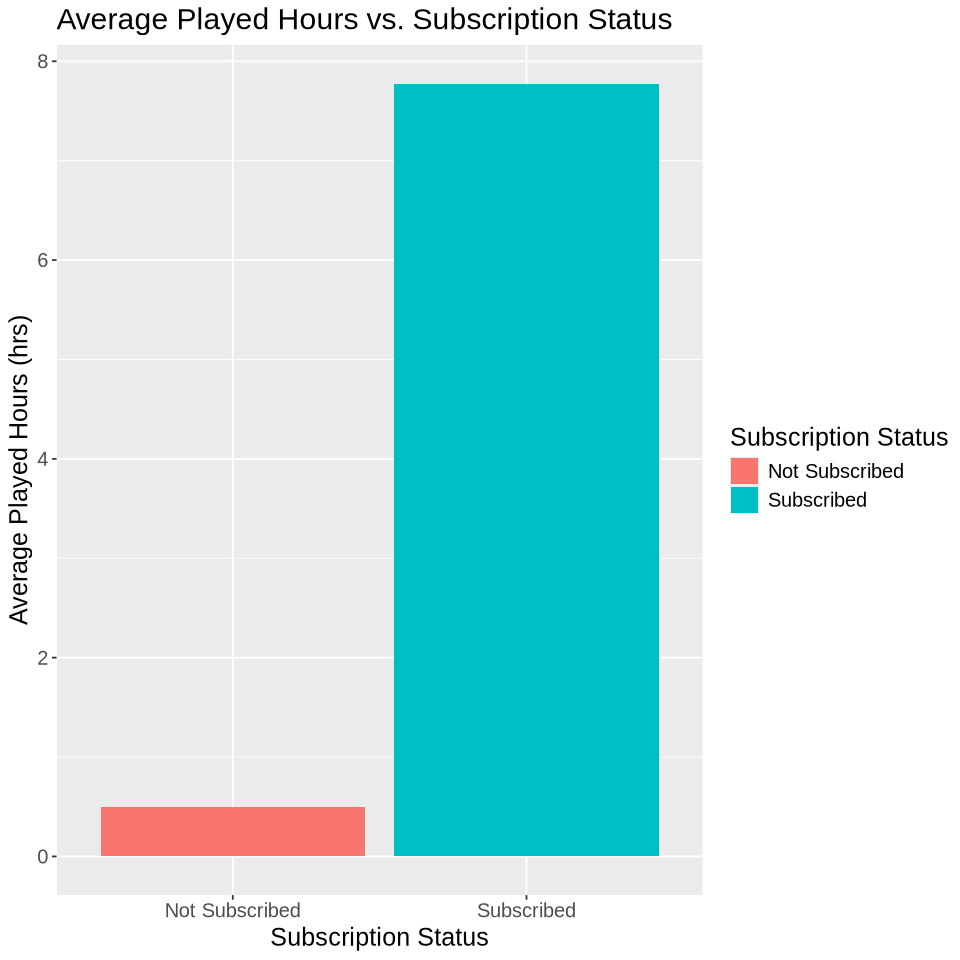

In [7]:
# Compute average played hours by subscription status
avg_played_hours_sub <- tidy_player_dataset |>
  group_by(subscribe) |>
  summarise(avg_hours = mean(played_hours, na.rm = TRUE)) 

# Create the bar plot
sub_bar <- ggplot(avg_played_hours_sub, aes(x = subscribe, y = avg_hours, fill = subscribe)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Played Hours vs. Subscription Status",
       x = "Subscription Status",
       y = "Average Played Hours (hrs)",
       fill = "Subscription Status") +
  theme(text = element_text(size = 15))
sub_bar

Bar Plot: Average Played Hours vs. Subscription Status

The comparison between subscribed and non-subscribed players demonstrates a clear and significant difference in playtime. Subscribed players spend singnificantly more time playing than non-subscribers, suggesting that subscribed players are most liekly to contribute more to large amount of data. 